In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/마케팅_전처리/온라인마케팅.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,CRM 마케터 및 디지털 마케터 글로벌 브랜드의 이탈 방지 구매 유도 리텐션 등 ...,CRM 경력 3년 이상 다양한 유관부서 개발자 DBA 디자이너 마케터 등 과의 협...
1,1 국내외 인플루언서 마케팅 시장 동향 리서치 및 분석 2 피처링 웹사이트내 블로그...,1 인플루언서 마케팅커머스에 관심 있으신 분 2 인플루언서 마케팅 커리어를 만들고 ...
2,퍼포먼스 마케터는 주로 이런 업무를 해요 Google Tiktok Meta Ad ...,이런 분과 함께하고 싶어요 퍼포먼스 마케팅UA 이외 퍼포먼스 액션 포함 경력 5년...
3,We are looking for a resultsdriven digital mar...,Minimum 35 years of working experience in a d...
4,컨텐츠 마케팅 전략 기획 블로그 관리 업무 SNS바이럴 마케팅 콘텐츠 제작 관리 ...,미적 감각을 겸비한 다재 다능한 마케터 Adobe Photoshop Illustr...
...,...,...
281,캠페인 전략 기획 및 플래닝 클라이언트 커뮤니케이션크리에이티브 기획캠페인 실행성과...,학력 대졸 이상 4년 전공 무관경력 동종업계 유사 직무 경력 3년 9년유연한...
282,네이버구글 등 SA 광고 운영 제품별 SA 광고 목표 및 전략 수립 제품별 SA ...,유관 경력 1년 이상 네이버구글 등의 SA 광고에서 성과를 개선한 경험이 있는 분...
283,글로벌사업팀 해외 제품마케터해외 인플루언서 섭외 및 마케팅 협업 체계 구축제품마케...,경력 및 국적 무관 신입 지원가능 원활한 외국어 사용 가능하신 분 영어 일본어 베트...
284,패스트캠퍼스 강의들을 널리 알릴 수 있는 프로덕트 콘텐츠 스페셜리스트 패스트캠퍼스의...,마케팅 경력 최소 2년 이상인 분 SNS 브런치 블로그 뉴스레터 등 마케팅 채널을...


In [3]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,CRM 경력 3년 이상 다양한 유관부서 개발자 DBA 디자이너 마케터 등 과의 협...
1,1 인플루언서 마케팅커머스에 관심 있으신 분 2 인플루언서 마케팅 커리어를 만들고 ...
2,이런 분과 함께하고 싶어요 퍼포먼스 마케팅UA 이외 퍼포먼스 액션 포함 경력 5년...
3,Minimum 35 years of working experience in a d...
4,미적 감각을 겸비한 다재 다능한 마케터 Adobe Photoshop Illustr...
...,...
281,학력 대졸 이상 4년 전공 무관경력 동종업계 유사 직무 경력 3년 9년유연한...
282,유관 경력 1년 이상 네이버구글 등의 SA 광고에서 성과를 개선한 경험이 있는 분...
283,경력 및 국적 무관 신입 지원가능 원활한 외국어 사용 가능하신 분 영어 일본어 베트...
284,마케팅 경력 최소 2년 이상인 분 SNS 브런치 블로그 뉴스레터 등 마케팅 채널을...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/마케팅_전처리/온라인마케팅(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n CRM 경력 3년 이상 다양한 유관부서 개발자 DBA 디자이너 마케터 등 과의 협업에 능하신 분 데이터에 기반하여 성과를 분석하고 커뮤니케이션하는 업무방식에 익숙하신 분 디지털 이벤트 기획 경험자 해외여행에 결격사유가 없는 자  소비자 구매와 관련된 CRM 저니 설계를 해보신 분 SFMC 및 CDP 경험자 CRM 솔루션 경험자 SQL GA Appsflyer 등 트래킹 툴 실무 적용 경험 소비자 대상 메시지 작성에 어려움이 없는 분 간결한 글쓰기 스타트업 경력자 또는 스타트업 근무 희망자  글로벌 브랜드 및 국내 브랜드 등 의 마케팅 경험 가설 수립 및 검증에 대한 설계 경험이 있으신 분\n1 인플루언서 마케팅커머스에 관심 있으신 분 2 인플루언서 마케팅 커리어를 만들고 싶은 분 3 고객의 마음을 움직이는 스토리텔링 능력이 있으신 분 1 어도비 스케치 피그마 등 프로그램을 기본적으로 다룰 수 있으신 분 2 카피라이팅 스토리텔링 능력이 있으신 분 3 B2B 세일즈 마케팅 경험이 있으신 분 4 인플루언서 및 MCN 관련 업무에 대한 관심 및 인사이트가 많은 분5 소셜미디어 플랫폼Instagram Youtube Tiktok 네이버 블로그 등에 대한 이해도가 높은 분\n 이런 분과 함께하고 싶어요 퍼포먼스 마케팅UA 이외 퍼포먼스 액션 포함 경력 5년 이상을 보유하신 분 데이터 기반의 사고로 퍼포먼스 마케팅 전략을 기획수행하며 최적화 달성 경험을 보유하신 분 성과 분석을 통한 인사이트 도출 및 Next Plan 설계가 가능하신 분 서비스 퍼널에 대해 이해하고 LTV ARPU 등 마케팅 주요 지표를 이해할 수 있으신 분우대사항 이런 분은 더욱 반가워요 일본어로 비즈니스 의사소통이 가능하신 분 일본어 관련 자격증 혹은 일본어 역량을 나타낼 수 있는 활동이 있다면 이력서에 명시해주세요 문제 해결을 최우선으로 생각하고 데이터 드리븐을 통한 성과 개선 경험을 보유하신 분 SQL 등을 통해 데이터를 원하는 결과물로 가공하고 인사이트를 발굴할 수 있으신 

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '경력',
 '이상',
 '유관',
 '부서',
 '개발자',
 '디자이너',
 '마케터',
 '등',
 '협업',
 '능',
 '분',
 '데이터',
 '기반',
 '성과',
 '분석',
 '커뮤니케이션',
 '업무',
 '방식',
 '분',
 '디지털',
 '이벤트',
 '기획',
 '경험',
 '해외여행',
 '결격',
 '사유',
 '자',
 '소비자',
 '구매',
 '관련',
 '저니',
 '설계',
 '분',
 '및',
 '경험',
 '솔루션',
 '경험',
 '등',
 '트래킹',
 '툴',
 '실무',
 '적용',
 '경험',
 '소비자',
 '대상',
 '메시지',
 '작성',
 '어려움',
 '분',
 '글쓰기',
 '스타트업',
 '경력',
 '스타트업',
 '근무',
 '희망',
 '글로벌',
 '브랜드',
 '및',
 '국내',
 '브랜드',
 '등',
 '의',
 '마케팅',
 '경험',
 '가설',
 '수립',
 '및',
 '검증',
 '대한',
 '설계',
 '경험',
 '분',
 '인',
 '플루',
 '마케팅',
 '커머스',
 '관심',
 '분',
 '인',
 '플루',
 '마케팅',
 '커리어',
 '분',
 '고객',
 '마음',
 '스토리텔링',
 '능력',
 '분',
 '어도비',
 '스케치',
 '피',
 '마',
 '등',
 '프로그램',
 '기본',
 '수',
 '분',
 '카피라이팅',
 '스토리텔링',
 '능력',
 '분',
 '마케팅',
 '경험',
 '분',
 '인',
 '플루',
 '및',
 '관련',
 '업무',
 '대한',
 '관심',
 '및',
 '인사이트',
 '분',
 '소셜미디어',
 '플랫폼',
 '네이버',
 '블로그',
 '등',
 '대한',
 '이해도',
 '분',
 '분과',
 '퍼포먼스',
 '마케팅',
 '이외',
 '퍼포먼스',
 '액션',
 '포함',
 '경력',
 '이상',
 '보유',
 '분',
 '데이터',
 

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

13677
894


FreqDist({'분': 1350, '경험': 559, '마케팅': 413, '및': 329, '경력': 328, '등': 246, '이상': 233, '보유': 210, '대한': 185, '콘텐츠': 164, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '우대',
 '사항',
 '유관',
 '부서',
 '개발자',
 '디자이너',
 '마케터',
 '협업',
 '능',
 '데이터',
 '기반',
 '성과',
 '분석',
 '커뮤니케이션',
 '방식',
 '이벤트',
 '기획',
 '경험',
 '해외여행',
 '결격',
 '사유',
 '자',
 '소비자',
 '구매',
 '저니',
 '설계',
 '경험',
 '솔루션',
 '경험',
 '트래킹',
 '툴',
 '실무',
 '적용',
 '경험',
 '소비자',
 '대상',
 '메시지',
 '작성',
 '어려움',
 '글쓰기',
 '스타트업',
 '스타트업',
 '근무',
 '희망',
 '글로벌',
 '브랜드',
 '국내',
 '브랜드',
 '의',
 '마케팅',
 '경험',
 '가설',
 '검증',
 '설계',
 '경험',
 '마케팅',
 '커머스',
 '마케팅',
 '커리어',
 '고객',
 '마음',
 '스토리텔링',
 '어도비',
 '스케치',
 '프로그램',
 '기본',
 '카피라이팅',
 '스토리텔링',
 '마케팅',
 '경험',
 '인사이트',
 '소셜미디어',
 '플랫폼',
 '네이버',
 '블로그',
 '분과',
 '퍼포먼스',
 '마케팅',
 '이외',
 '퍼포먼스',
 '액션',
 '포함',
 '데이터',
 '기반',
 '사고',
 '퍼포먼스',
 '마케팅',
 '전략',
 '기획',
 '수행',
 '최적화',
 '달성',
 '경험',
 '성과',
 '분석',
 '통한',
 '인사이트',
 '도출',
 '설계',
 '서비스',
 '퍼널',
 '대해',
 '이해',
 '마케팅',
 '주요',
 '지표',
 '이해',
 '사항',
 '더욱',
 '일본어',
 '비즈니스',
 '의사소통',
 '일본어',
 '자격증',
 '일본어',
 '역량',
 '활동',
 '이력서',
 '명시',
 '문제',
 '최',
 '우선',
 '생각',
 '데이터',
 '드리븐',
 '통한',
 '성과',
 '개선',
 '경험',
 '통해',
 '데

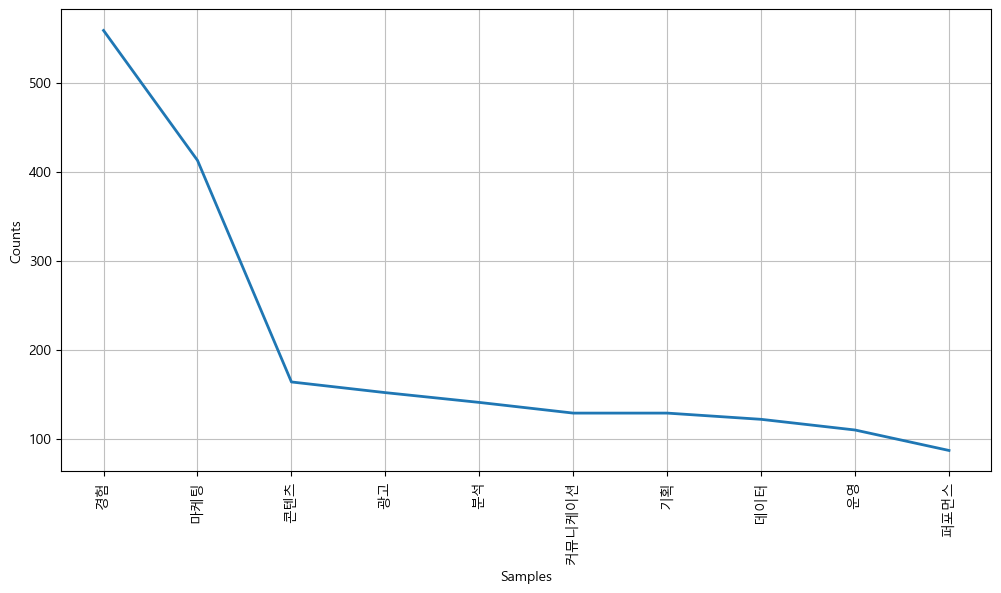

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

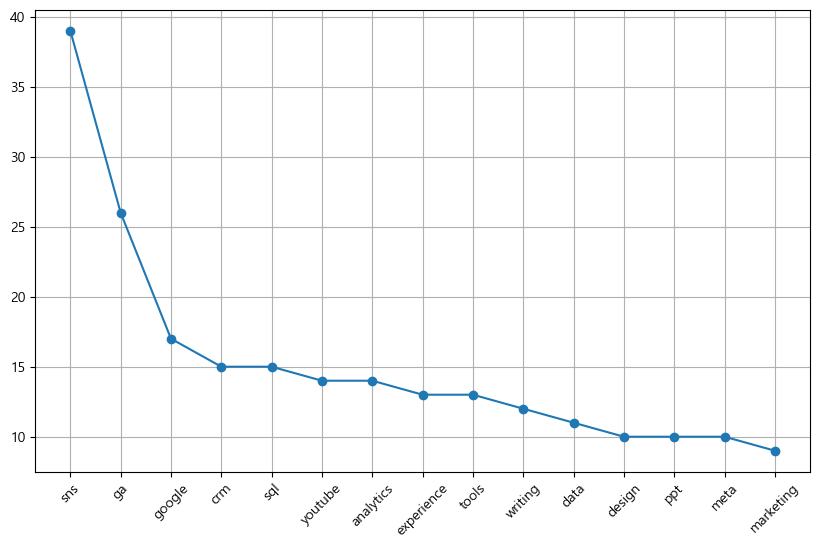

In [12]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['strong','enjoy','pc','journey','work','etc','face','wallet','success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)